# Observations from the Data


There is a clear trend showing that higher Fire Weather Index (FWI) values correlate strongly with the "fire" classification, while lower FWI values are mostly associated with the "not fire" classification.

FWI Threshold: FWI values below 2.0 are predominantly classified as "not fire", while values above 2.0 are largely classified as "fire".

Distribution of Classes: Most instances of the "not fire" class have FWI values below 1.0, whereas "fire" instances are rarely found below 2.0.

High FWI Values and Fire: FWI values exceeding 10.0 are consistently classified as "fire", indicating a strong likelihood of fire occurrence at higher FWI levels.

These points highlight a significant correlation between the FWI and fire incidence, suggesting that the likelihood of fire increases as the FWI rises. For example, FWI values such as 0.5, 0.4, and 0.1 are consistently classified as "not fire", while values like 7.2, 10.6, and 15 are classified as "fire". This pattern underscores the importance of monitoring FWI values to predict and manage fire risks effectively.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\srish\Downloads\Projects\Algerian Forest Fire\ALgerian_forest_fires_cleaned.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
#dropping unnecessary columns
df.drop(['day','month','year'],axis =1, inplace = True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
##Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
##Division of independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
#Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

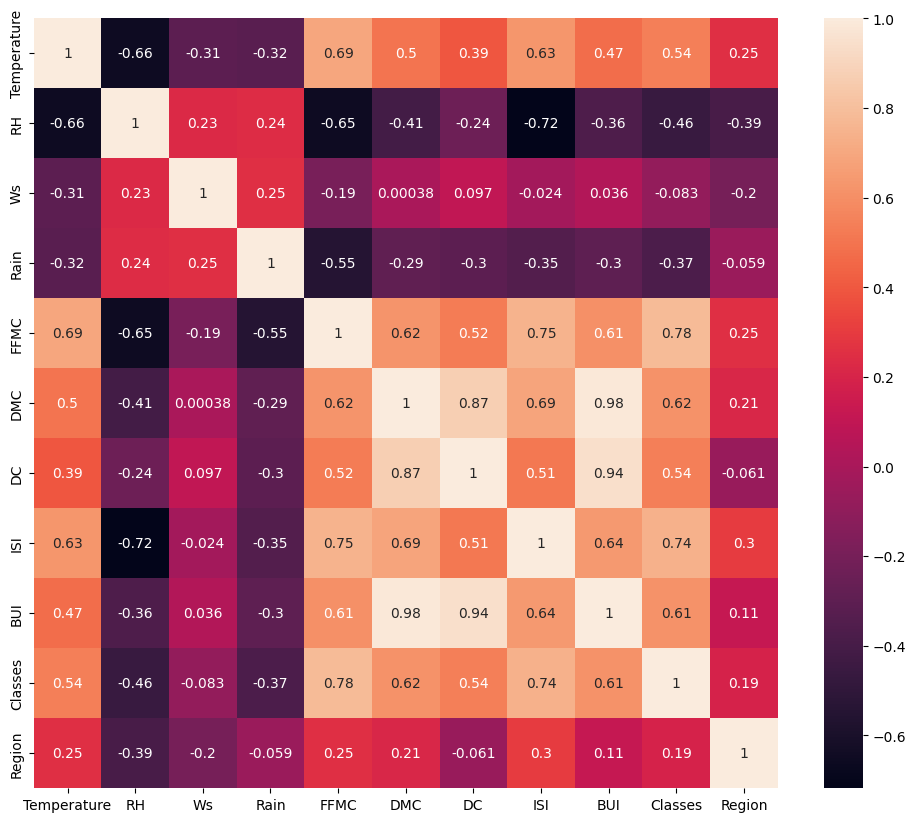

In [14]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [15]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
features = correlation(X_train,0.85)

In [17]:
## Dropping features having correlation above threshold value of 0.85
X_train.drop(features,axis =1, inplace =True)
X_test.drop(features, axis=1,inplace =True)

In [18]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

# Features Scaling or standardisation

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [20]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

# Understanding the effect of standard scaler using boxplots

Text(0.5, 1.0, 'X_train after scaling')

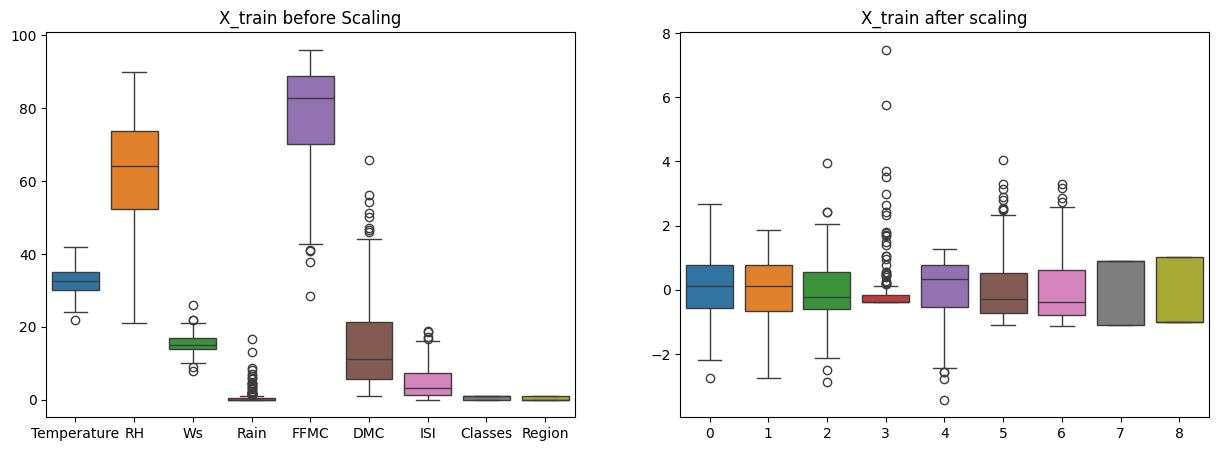

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

## Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

#Mean Absolute error
from sklearn.metrics import mean_absolute_error
y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",mae)

# R-2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R-2 Score :",score)

Mean Absolute Error : 0.546823646524997
R-2 Score : 0.9847657384266951


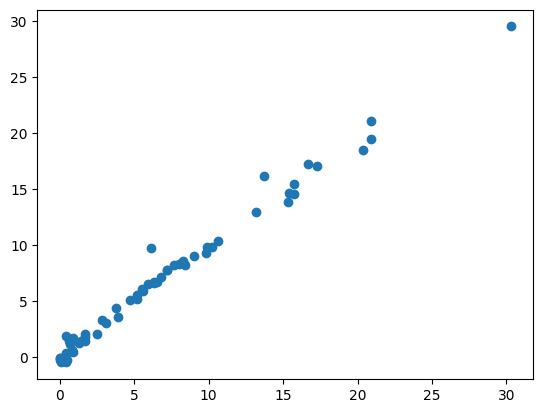

In [23]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred)

## Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
Lasso=Lasso()
Lasso.fit(X_train_scaled,y_train)

#Mean Absolute error
y_pred1 = Lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred1)
print("Mean Absolute Error :",mae)

# R-2 Score
score=r2_score(y_test,y_pred)
print("R-2 Score :",score)

Mean Absolute Error : 1.133175994914409
R-2 Score : 0.9847657384266951


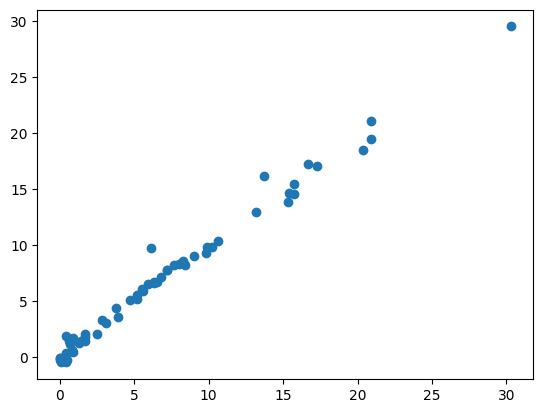

In [25]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred)

## Cross validation lasso

In [26]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [27]:
lassocv.alpha_
y_pred1 = lassocv.predict(X_test_scaled)

In [28]:
#Mean Absolute error
mae = mean_absolute_error(y_test,y_pred1)
print("Mean Absolute Error :",mae)

# R-2 Score
score=r2_score(y_test,y_pred1)
print("R-2 Score :",score)

Mean Absolute Error : 0.6199701158263431
R-2 Score : 0.9820946715928275


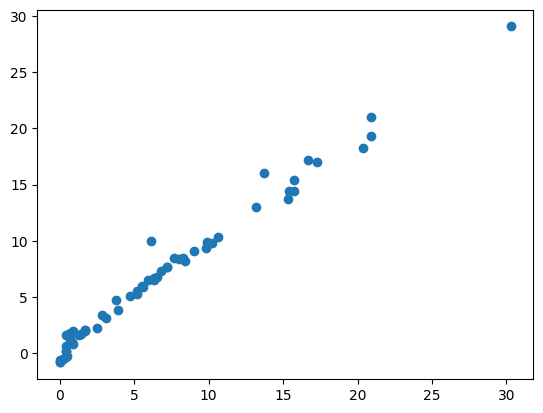

In [29]:

plt.scatter(y_test,y_pred1)

## Ridge Regression Model

In [30]:
from sklearn.linear_model import Ridge
Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)

#Mean Absolute error
y_pred2 = Ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred2)
print("Mean Absolute Error :",mae)

# R-2 Score
score=r2_score(y_test,y_pred2)
print("R-2 Score :",score)

Mean Absolute Error : 0.5642305340105691
R-2 Score : 0.9842993364555513


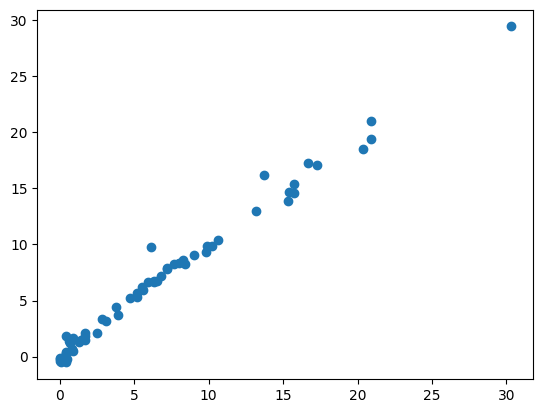

In [31]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred2)

## Elastic Net Regression model

In [32]:
from sklearn.linear_model import ElasticNet
Elastic=ElasticNet()
Elastic.fit(X_train_scaled,y_train)

#Mean Absolute error
y_pred3 = Elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred3)
print("Mean Absolute Error :",mae)

# R-2 Score
score=r2_score(y_test,y_pred3)
print("R-2 Score :",score)

Mean Absolute Error : 1.8822353634896
R-2 Score : 0.8753460589519703


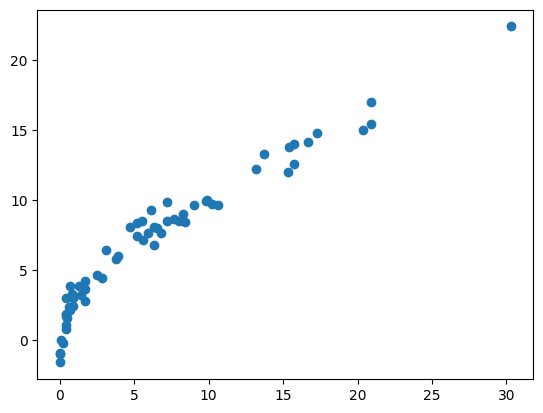

In [33]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred3)

## Cross Validation with Ridge Regression

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred4 = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred4)
print("Mean Absolute Error :",mae)

# R-2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred4)
print("R-2 Score :",score)

Mean Absolute Error : 0.5642305340105691
R-2 Score : 0.9842993364555513


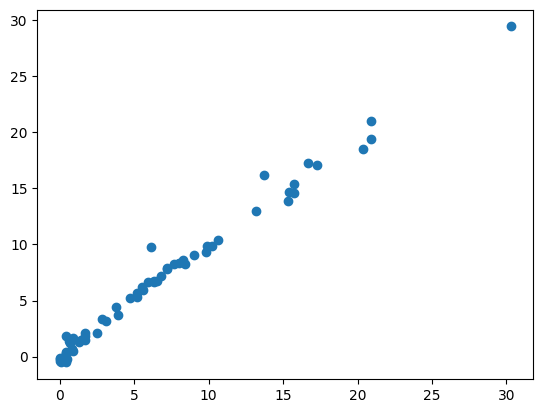

In [35]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred4)

## Cross Validation with Elastic Net


In [36]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_scaled,y_train)

y_pred5 = ElasticNetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred5)
print("Mean Absolute Error :",mae)

# R-2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred5)
print("R-2 Score :",score)

Mean Absolute Error : 0.6575946731430901
R-2 Score : 0.9814217587854941


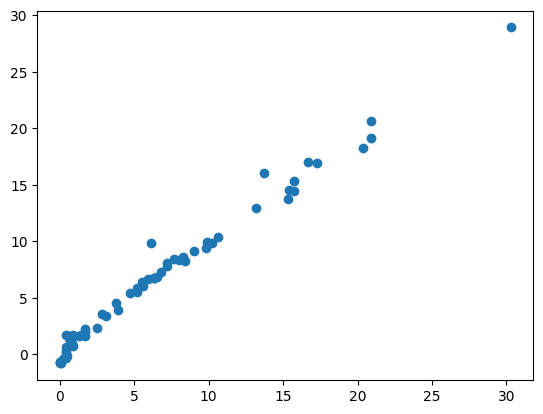

In [37]:
#Analysing the relationship between y_test and y_pred
plt.scatter(y_test,y_pred5)

# Conclusion

The Linear Regression model performs the best due to its simplicity and effectiveness in capturing the linear relationships between the features and the target variable. The low Mean Absolute Error (MAE) of 0.5468 indicates that the model's predictions are very close to the actual values, minimizing the average magnitude of errors. The high R-2 score of 0.9848 shows that the model explains a large proportion of the variance in the target variable, indicating a strong fit to the data.

Ridge Regression and Ridge Cross-Validation (RidgeCV) also perform well because they address the issue of multicollinearity (when predictor variables are highly correlated) by adding a regularization term to the linear regression. This regularization helps in preventing overfitting, especially when the number of predictors is large, leading to a performance very similar to Linear Regression.

Lasso Regression, while useful for feature selection by shrinking some coefficients to zero, shows higher MAE and performs worse than Linear Regression due to potentially over-penalizing some of the coefficients. However, Lasso Cross-Validation (LassoCV) improves its performance by tuning the regularization parameter through cross-validation, thus achieving better prediction accuracy.

Elastic Net Regression combines the penalties of Lasso and Ridge, but in this case, it performs the worst with the highest MAE and lowest R-2 score, possibly due to over-penalization or inadequate tuning of hyperparameters. The improvement seen with ElasticNet Cross-Validation (ElasticNetCV) highlights the importance of proper parameter tuning, but it still does not match the performance of Linear or Ridge Regression.

In summary, the Linear Regression model's superior performance can be attributed to its direct and effective approach to modeling linear relationships, while Ridge Regression’s competitive performance highlights the benefits of regularization in preventing overfitting.








### Pickling the File

In [38]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [39]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))